Importing packages and creating the DataFrame

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Mall_Customers.csv')

Calculating average and median annual income of the customers

In [17]:
average_income = df['Annual Income (k$)'].mean()
median_income = df['Annual Income (k$)'].median()

print(f"Average annual income of customers: ${average_income}K")
print(f"Median annual income of customers: ${median_income}K")
if average_income > median_income:
    print("The data is skewed to the right")
elif average_income < median_income:
    print("The data is skewed to the left")
else:
    print("The data is normal")



Average annual income of customers: $60.56K
Median annual income of customers: $61.5K
The data is skewed to the left


Creating a box plot of the data.

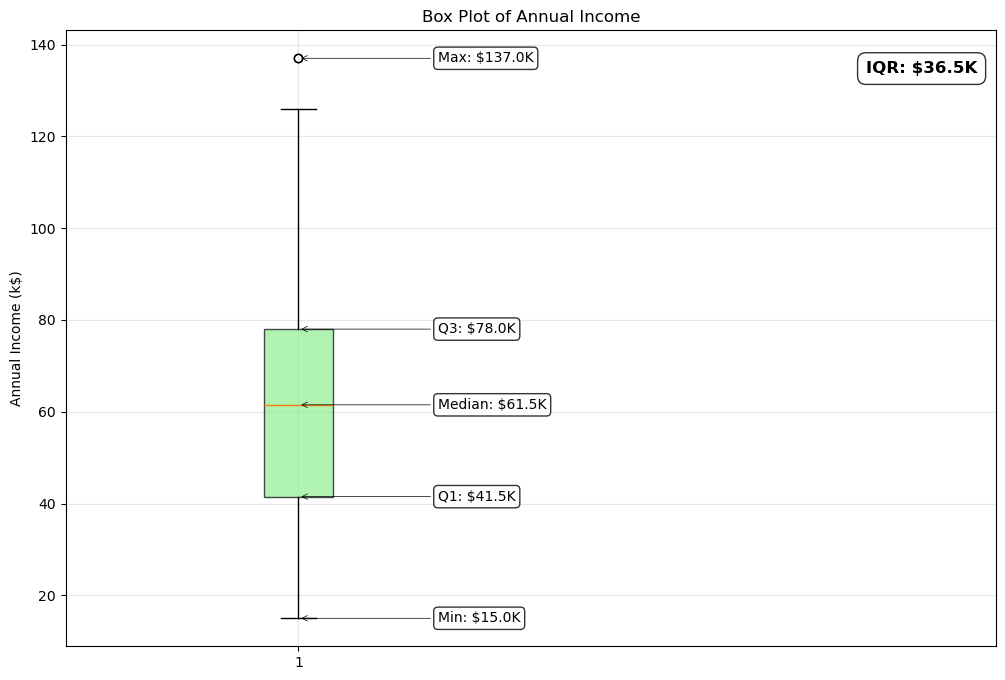

In [18]:
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(df['Annual Income (k$)'], patch_artist = True, boxprops = dict(facecolor = 'lightgreen', alpha = 0.7))

stats = df['Annual Income (k$)'].describe()

iqr = stats['75%'] - stats['25%']

values = {
    'Min': stats['min'],
    'Q1': stats['25%'],
    'Median': stats['50%'],
    'Q3': stats['75%'],
    'Max': stats['max'],
}

for label, value in values.items():
    plt.annotate(f'{label}: ${value:.1f}K', xy = (1, value), xytext = (1.3, value), fontsize = 10, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'black', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

plt.text(0.98, 0.95, f'IQR: ${iqr:.1f}K', transform = plt.gca().transAxes, fontsize = 12, fontweight = 'bold', ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.5", facecolor = "white", alpha = 0.8))

plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.xlim(0.5, 2.5)
plt.grid(True, alpha = 0.3)
plt.show()

Showing the number of males vs. females


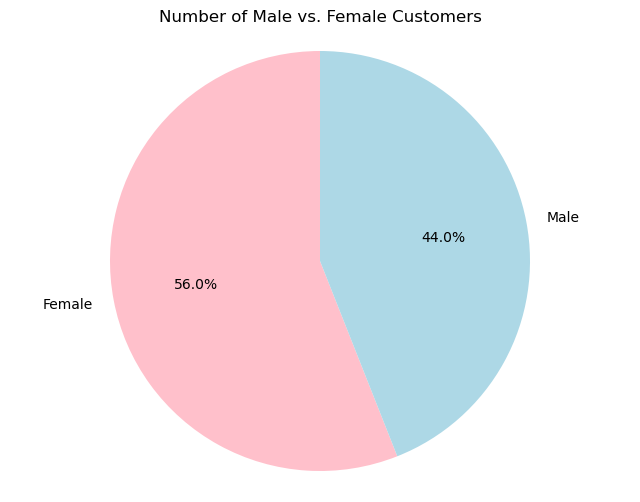

In [19]:
gender_counts = df['Genre'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['pink', 'lightblue'])
plt.title('Number of Male vs. Female Customers')
plt.axis('equal')

plt.show()

Box plot showing income of both genders

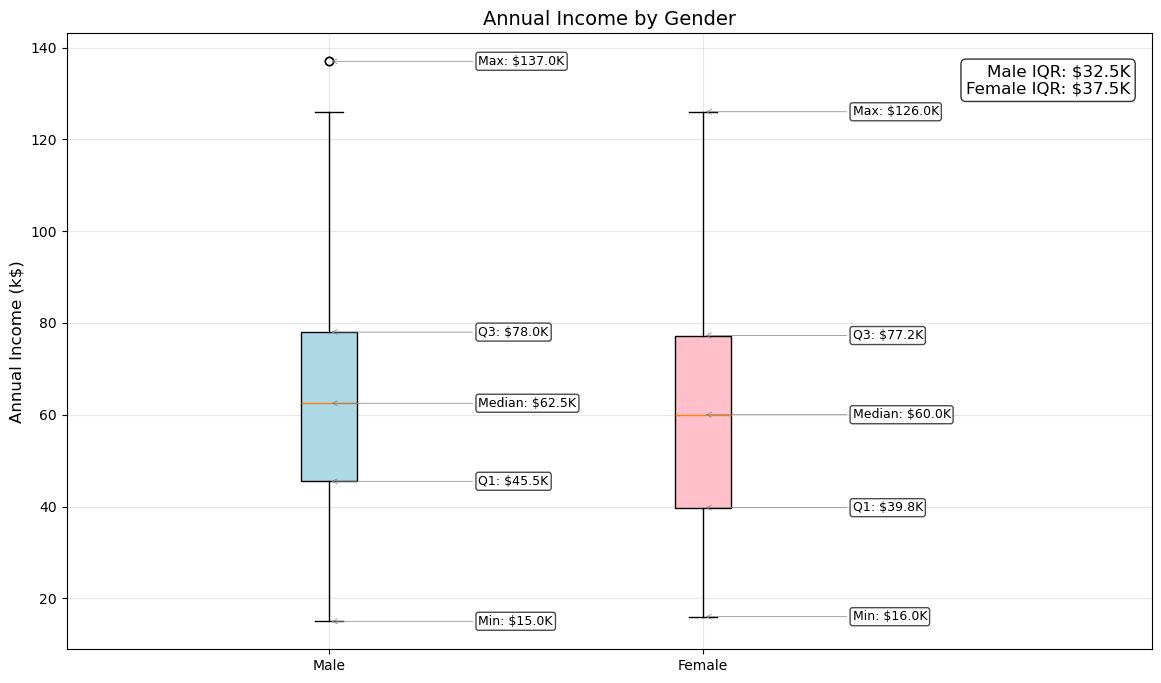

In [20]:
plt.figure(figsize=(14, 8))

male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

box_plot = plt.boxplot([male_income, female_income], tick_labels=['Male', 'Female'], patch_artist=True)

colors = ['lightblue', 'pink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

genders = ['Male', 'Female']
data_groups = [male_income, female_income]

for i, (gender, data) in enumerate(zip(genders, data_groups), 1):
    stats = data.describe()

    annotations = [
        (f'Min: ${stats["min"]:.1f}K', stats['min']),
        (f'Q1: ${stats["25%"]:.1f}K', stats['25%']),
        (f'Median: ${stats["50%"]:.1f}K', stats['50%']),
        (f'Q3: ${stats["75%"]:.1f}K', stats['75%']),
        (f'Max: ${stats["max"]:.1f}K', stats['max'])
    ]

    for j, (label, value) in enumerate(annotations):
        plt.annotate(label, xy=(i, value), xytext=(i + 0.4, value), fontsize=9, verticalalignment='center', arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

# Calculating IQR
male_stats = male_income.describe()
female_stats = female_income.describe()
male_iqr = male_stats['75%'] - male_stats['25%']
female_iqr = female_stats['75%'] - female_stats['25%']

iqr_values = f'Male IQR: ${male_iqr:.1f}K\nFemale IQR: ${female_iqr:.1f}K'

plt.text(0.98, 0.95, iqr_values, transform = plt.gca().transAxes, fontsize = 12, ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

# Title of the boxplot
plt.title('Annual Income by Gender', fontsize = 14)
plt.ylabel('Annual Income (k$)', fontsize = 12)
plt.xlim(0.3, 3.2)
plt.grid(True, alpha = 0.3)
plt.show()

Calculating the median age

In [21]:
median_age = df['Age'].median()

print(f'Median age of customers: {median_age} years')

Median age of customers: 36.0 years


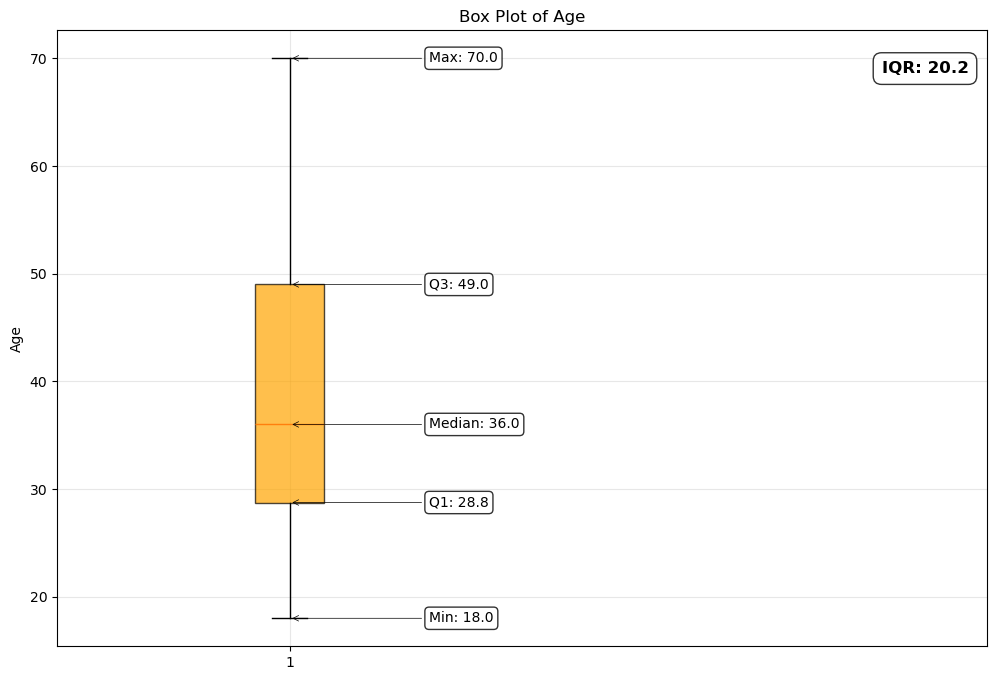

In [22]:
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(df['Age'], patch_artist = True, boxprops = dict(facecolor = 'orange', alpha = 0.7))

stats = df['Age'].describe()

iqr = stats['75%'] - stats['25%']

values = {
    'Min': stats['min'],
    'Q1': stats['25%'],
    'Median': stats['50%'],
    'Q3': stats['75%'],
    'Max': stats['max'],
}

for label, value in values.items():
    plt.annotate(f'{label}: {value:.1f}', xy = (1, value), xytext = (1.3, value), fontsize = 10, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'black', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

plt.text(0.98, 0.95, f'IQR: {iqr:.1f}', transform = plt.gca().transAxes, fontsize = 12, fontweight = 'bold', ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.5", facecolor = "white", alpha = 0.8))

plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xlim(0.5, 2.5)
plt.grid(True, alpha = 0.3)
plt.show()

Mean and Standard Deviation of Spending Scores

In [23]:
spending_scores = df['Spending Score (1-100)']

mean_score = spending_scores.mean()
std_score = spending_scores.std()
median_score = spending_scores.median()

print(f"Average score: {mean_score:.2f}")
print(f"Standard deviation: {std_score:.2f}")
print(f"Median score: {median_score}")

Average score: 50.20
Standard deviation: 25.82
Median score: 50.0


Creating a normal distribution graph for spending score

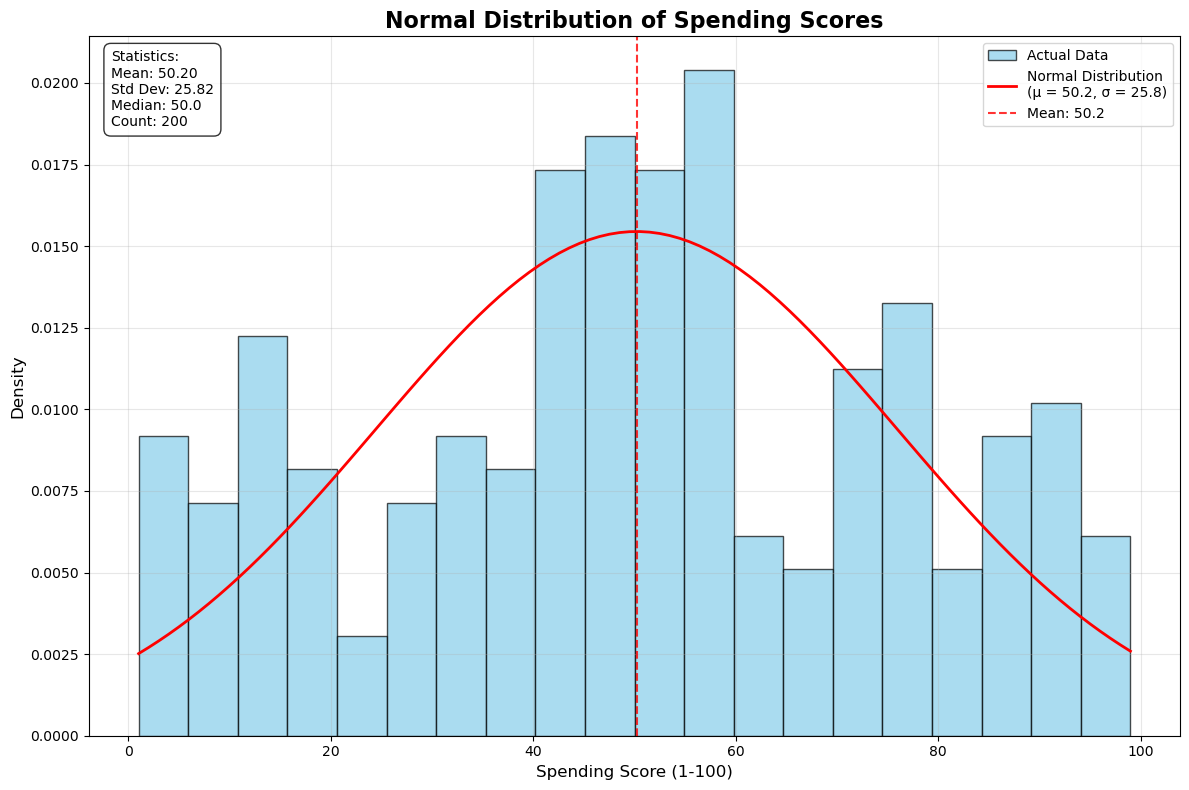

Statistic: 0.9695
P-value: 0.0002
The data is not a normal distribution (p <= 0.05)


In [24]:
from scipy import stats

plt.figure(figsize = (12, 8))

n, bins, patches = plt.hist(spending_scores, bins = 20, density = True, alpha = 0.7, color = 'skyblue', edgecolor = 'black', label = 'Actual Data')

x = np.linspace(spending_scores.min(), spending_scores.max(), 100)

normal_curve = stats.norm.pdf(x, mean_score, std_score)

plt.plot(x, normal_curve, 'r-', linewidth = 2, label = f'Normal Distribution\n(μ = {mean_score:.1f}, σ = {std_score:.1f})')

plt.axvline(mean_score, color = 'red', linestyle = '--', alpha = 0.8, label = f'Mean: {mean_score:.1f}')

plt.title('Normal Distribution of Spending Scores', fontsize = 16, fontweight = 'bold')
plt.xlabel('Spending Score (1-100)', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend()
plt.grid(True, alpha = 0.3)

stats_text = f'Statistics:\nMean: {mean_score:.2f}\nStd Dev: {std_score:.2f}\nMedian: {median_score}\nCount: {len(spending_scores)}'
plt.text(0.02, 0.98, stats_text, transform = plt.gca().transAxes, fontsize = 10, verticalalignment = 'top', bbox = dict(boxstyle = "round, pad = 0.5", facecolor = "white", alpha = 0.8))

plt.tight_layout()
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(spending_scores)
print(f"Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("The data is a normal distribution (p > 0.05)")
else:
    print("The data is not a normal distribution (p <= 0.05)")


A scatter plot that shows the correlation between the income and spending score

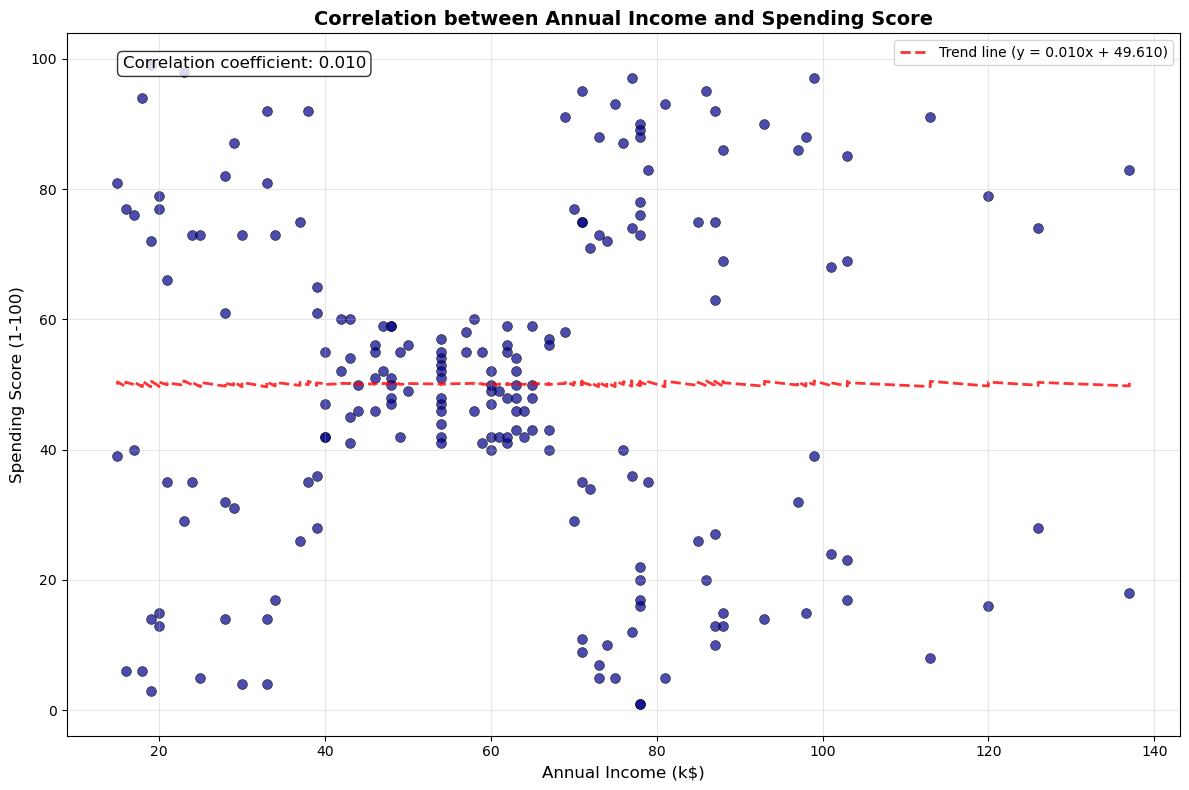

Correlation coefficient between Annual Income and Spending Score: 0.010
There is a no correlation between the annual income and spending score.


In [25]:
plt.figure(figsize = (12, 8))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha = 0.7, c = 'darkblue', s = 50, edgecolors = 'black', linewidth = 0.5)

plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.title('Correlation between Annual Income and Spending Score', fontsize = 14, fontweight = 'bold')

plt.grid(True, alpha = 0.3)

correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

plt.text(0.05, 0.95, f'Correlation coefficient: {correlation:.3f}', transform = plt.gca().transAxes, fontsize = 12, bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

z = np.polyfit(df['Annual Income (k$)'], df['Spending Score (1-100)'], 1)
p = np.poly1d(z)
plt.plot(df['Annual Income (k$)'], p(df['Spending Score (1-100)']), "r--", alpha = 0.8, linewidth = 2, label = f'Trend line (y = {z[0]:.3f}x + {z[1]:.3f})')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Correlation coefficient between Annual Income and Spending Score: {correlation:.3f}")

if abs(correlation) < 0.1:
    interpretation = "no correlation"
elif abs(correlation) < 0.3:
    interpretation = "weak correlation"
elif abs(correlation) < 0.5:
    interpretation = "moderate correlation"
elif abs(correlation) < 0.7:
    interpretation = "strong correlation"
else:
    interpretation = "very strong correlation"


print(f"There is a {interpretation} between the annual income and spending score.")